### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('West Bengal.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,16940088,8708978,8231110
1,1911,17998769,9349419,8649350
2,1921,17474348,9173148,8301200
3,1931,18897036,9997035,8900001
4,1941,23229552,12545269,10684283


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

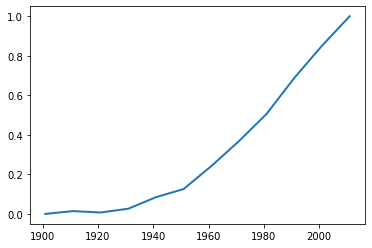

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.989487531378299

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.215271937221246, 1.4217536910911122, 1.6367112993035562, 1.858334387433274]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.215272
13,2031,1.421754
14,2041,1.636711
15,2051,1.858334


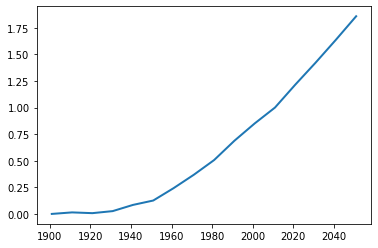

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


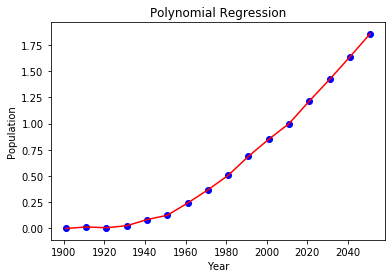

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[16940088.0,
 17998769.0,
 17474348.0,
 18897036.0,
 23229552.0,
 26299980.0,
 34926279.0,
 44312011.0,
 54580647.0,
 68077965.0,
 80176197.0,
 91276115.0,
 107278576.0,
 122627609.0,
 138606703.0,
 155081283.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,16940088.0
1,1911,17998769.0
2,1921,17474348.0
3,1931,18897036.0
4,1941,23229552.0
5,1951,26299980.0
6,1961,34926279.0
7,1971,44312011.0
8,1981,54580647.0
9,1991,68077965.0


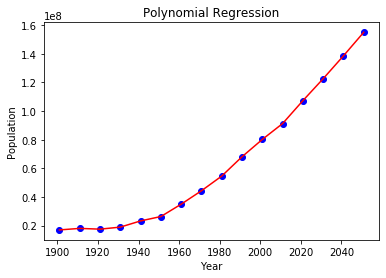

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.000000
1,1911,0.016809
2,1921,0.012183
3,1931,0.033807
4,1941,0.100690
5,1951,0.141641
6,1961,0.259584
7,1971,0.386535
8,1981,0.521047
9,1991,0.703455


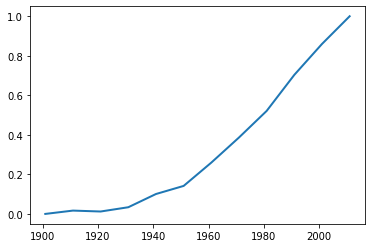

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9958747130262177

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.2040177526960179,
 1.3953339210756894,
 1.5910966604515124,
 1.7890817438146769]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.000000
1,1911,0.016809
2,1921,0.012183
3,1931,0.033807
4,1941,0.100690
5,1951,0.141641
6,1961,0.259584
7,1971,0.386535
8,1981,0.521047
9,1991,0.703455


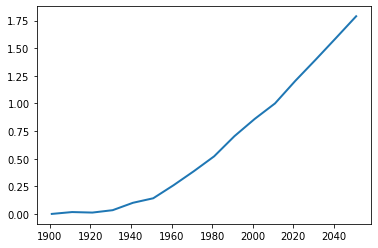

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

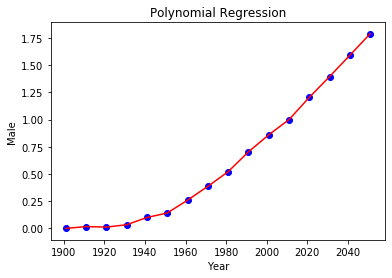

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[8708978.0,
 9349419.0,
 9173148.0,
 9997035.0,
 12545269.0,
 14105519.0,
 18599144.0,
 23435987.0,
 28560901.0,
 35510633.0,
 41465985.0,
 46809027.0,
 54582113.0,
 61871269.0,
 69329839.0,
 76873080.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,8708978.0
1,1911,9349419.0
2,1921,9173148.0
3,1931,9997035.0
4,1941,12545269.0
5,1951,14105519.0
6,1961,18599144.0
7,1971,23435987.0
8,1981,28560901.0
9,1991,35510633.0


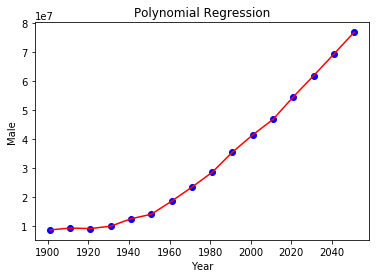

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.000000
1,1911,0.011542
2,1921,0.001934
3,1931,0.018459
4,1941,0.067700


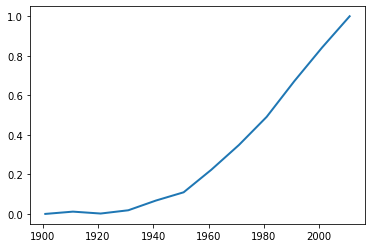

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9887323672689786

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.2271050657305977,
 1.4495325614471994,
 1.6846724714476977,
 1.9311495635271285]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.227105
13,2031,1.449533
14,2041,1.684672
15,2051,1.931150


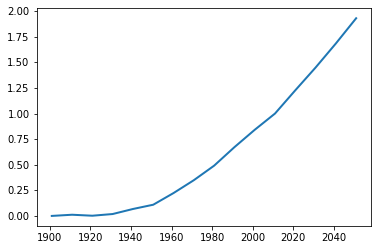

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

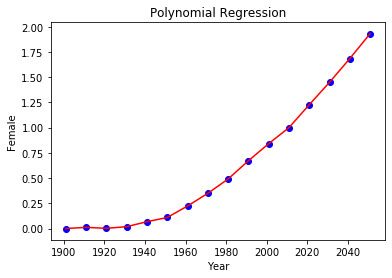

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[8231110.0,
 8649350.0,
 8301200.0,
 8900001.0,
 10684283.0,
 12194461.0,
 16327135.0,
 20876024.0,
 26019746.0,
 32567332.0,
 38710212.0,
 44467088.0,
 52696462.0,
 60756340.0,
 69276865.0,
 78208203.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,8231110.0
1,1911,8649350.0
2,1921,8301200.0
3,1931,8900001.0
4,1941,10684283.0
5,1951,12194461.0
6,1961,16327135.0
7,1971,20876024.0
8,1981,26019746.0
9,1991,32567332.0


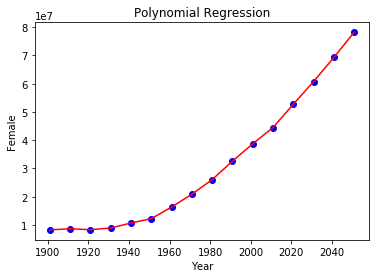

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [54]:
df4 = pd.concat([df1,df2,df3], axis =1)

In [55]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,16940088.0,1901,8708978.0,1901,8231110.0
1,1911,17998769.0,1911,9349419.0,1911,8649350.0
2,1921,17474348.0,1921,9173148.0,1921,8301200.0
3,1931,18897036.0,1931,9997035.0,1931,8900001.0
4,1941,23229552.0,1941,12545269.0,1941,10684283.0
5,1951,26299980.0,1951,14105519.0,1951,12194461.0
6,1961,34926279.0,1961,18599144.0,1961,16327135.0
7,1971,44312011.0,1971,23435987.0,1971,20876024.0
8,1981,54580647.0,1981,28560901.0,1981,26019746.0
9,1991,68077965.0,1991,35510633.0,1991,32567332.0
